# Model Comparison 

In [1]:
# first, test generative model on one dimensional graphs
import sys
import seaborn as sns
sys.path.append('../HCM')
from main import *
import matplotlib.pyplot as plt

/kyb/rg/swu/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
df

,Unnamed: 0,N,kl,type,d
0,0,100,0.057828,ck,3
1,1,100,0.106624,nn,3
2,2,200,0.101842,ck,3
3,3,200,0.123479,nn,3
4,4,300,0.026107,ck,3
...,...,...,...,...,...
10427,10427,2700,0.081354,nn,8
10428,10428,2800,0.182984,ck,8
10429,10429,2800,0.113221,nn,8
10430,10430,2900,0.168029,ck,8


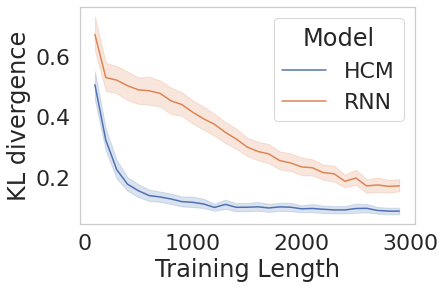

In [2]:
# sns.set_theme(style="ticks")
# sns.set_style(style='white')
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
df = pd.read_csv('../OutputData/KL_rational_learning_N')
# print(df)
ax = sns.lineplot(x="N", y="kl", hue = 'type',legend = False,
             data=df)
ax.set(ylabel='KL divergence', xlabel='Training Length')
plt.legend(title='Model', labels=['HCM', 'RNN'])

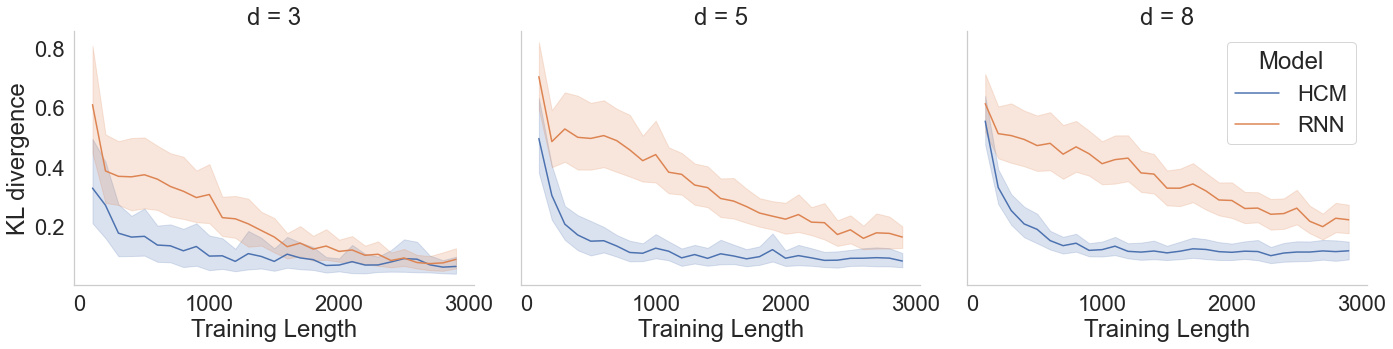

In [10]:
dfp = df[(df['d']==3)| (df['d']==5)|(df['d']==8)]

sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
ax = sns.relplot(
    data=dfp,
    x="N", y="kl",
    hue="type", col="d",
    kind="line",size_order=["T1", "T2"],
    legend = False,
    height=5, aspect=1.3, facet_kws=dict(sharex=True),
)
ax.set(ylabel='KL divergence', xlabel='Training Length')
plt.legend(title='Model', labels=['HCM', 'RNN'])